<a href="https://colab.research.google.com/github/Alex112525/Neural-Networks-with-TensorFlow/blob/main/Datasets_Generators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is a data generator? 

In the context of machine learning, a data generator is a function or an object that allows you to generate and feed data to a model in a way that doesn't require loading all the data into memory at once. This is particularly useful when dealing with large datasets that cannot fit in memory, or when working with data that can be generated on the fly. The data generator can provide data in batches and perform various data augmentation techniques to increase the diversity of the data.

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/sign-language-img.zip \
    -O /tmp/sign-language-img.zip

In [2]:
import os 
import zipfile

local_zip = "/tmp/sign-language-img.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall()
zip_ref.close()

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_dir = "/content/Train"
test_dir = "/content/Test"

The code **train_datagen = ImageDataGenerator(rescale = 1/255)** creates an *ImageDataGenerator* object that applies a rescaling transformation to the input images during training. The rescale argument sets the scaling factor for the pixel values, which in this case will be divided by 255 to normalize them between 0 and 1. 

This is a common preprocessing step that can help improve the performance of deep learning models.

In [8]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255, validation_split=0.3)

The next code sets up an image data generator to load images from a directory, rescales pixel values to the range of 0 to 1, resizes images to 28x28, uses grayscale images, sets the batch size to 128, sets the class mode to "categorical" for multiclass classification. 

It returns a generator object that can be used to load batches of images and labels during model training.

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "training"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale"
)

Found 27455 images belonging to 24 classes.
Found 2141 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


Creating an array with the classes in our dataset

In [11]:
classes = [char for char in string.ascii_uppercase if char!="J" or char!="Z"]
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [12]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (10, 10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0])
    ax.axis("off")
  plt.tight_layout()
  plt.show()

Testing our **DataGenerator**

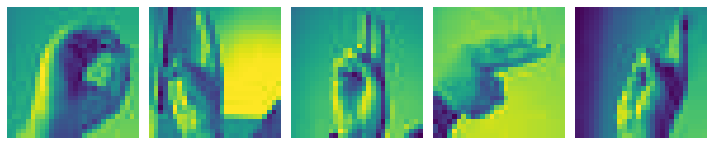

In [13]:
sample_training_images, _= next(train_generator)
plotImages(sample_training_images[:5])